In [3]:
import pandas as pd
import numpy as np

In [5]:
from sklearn import datasets

In [41]:
iris = datasets.load_iris()
X = iris.data[:,[0,2]]
y = iris.target

In [9]:
#y = np.where(y == 0, -1, 1)

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [49]:
from sklearn.preprocessing import StandardScaler

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [57]:
y_pred = random_forest.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.67%


In [71]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

In [73]:
Z = random_forest.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

In [75]:
from matplotlib import pyplot as plt

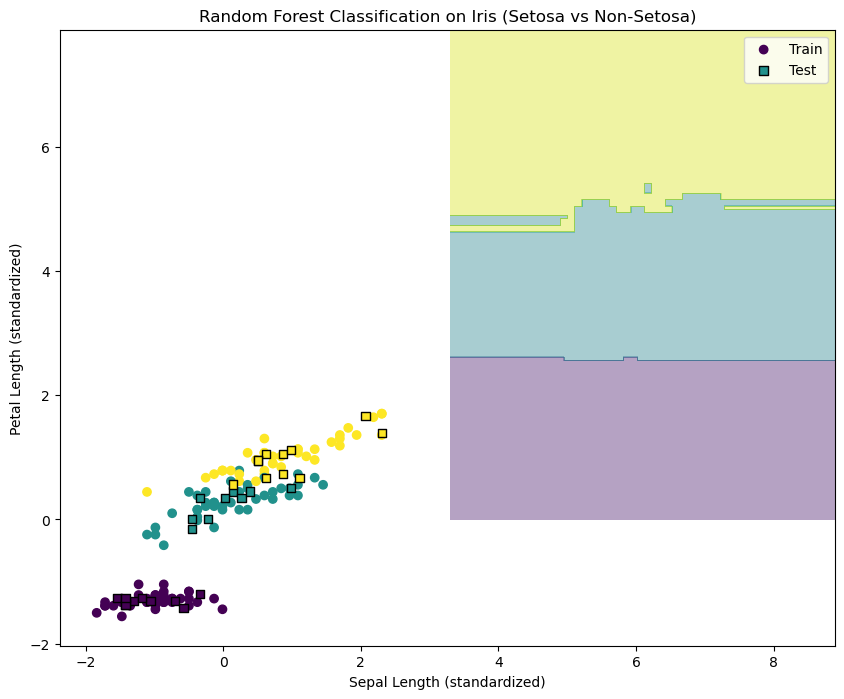

In [77]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='s', label='Test', edgecolor='black')
plt.xlabel('Sepal Length (standardized)')
plt.ylabel('Petal Length (standardized)')
plt.title('Random Forest Classification on Iris (Setosa vs Non-Setosa)')
plt.legend()
plt.show()